<a href="https://colab.research.google.com/github/Kinnaruo/MachineLearning/blob/main/Week%202/RegresionBostonHouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import QuantileTransformer, MinMaxScaler, StandardScaler, RobustScaler

In [96]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
print(df.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


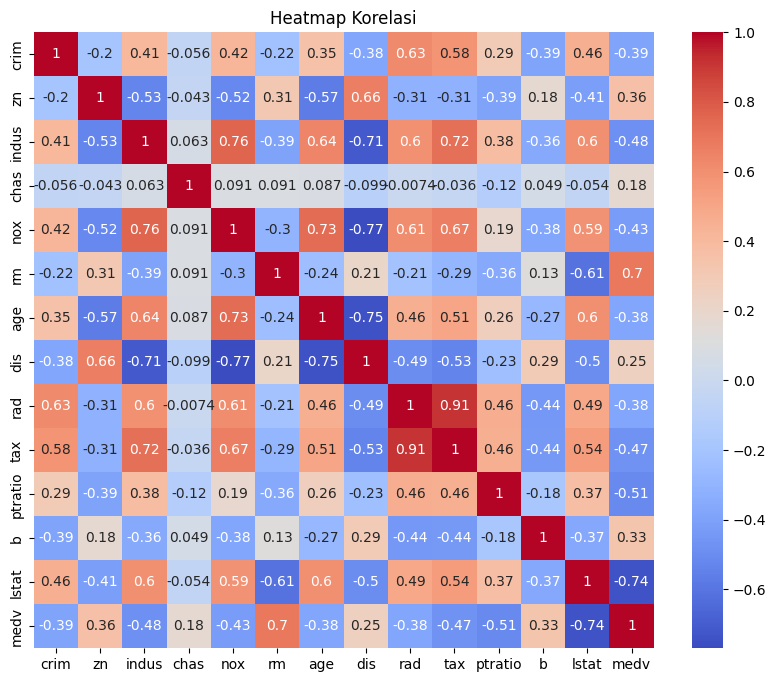

In [98]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi")
plt.show()

$$
r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}}
$$

Rumus di atas adalah koefisien korelasi Pearson ($r$) yang digunakan untuk mengukur hubungan linier antara dua variabel.

Dengan keterangan:
* $x_i, y_i$ = Nilai individu dari variabel $x$ dan $y$
* $\bar{x}, \bar{y}$ = Rata-rata dari variabel $x$ dan $y$
* $n$ = Jumlah total data
- **Pembilang**:  
  $$
  \sum_{i=1}^{n} (x_i - \bar{x}) (y_i - \bar{y})
  $$  
  Menghitung **kovarians** antara \( x \) dan \( y \), yaitu seberapa besar kedua variabel berubah bersama.  
- **Penyebut**:  
  $$
  \sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}
  $$  
  Perkalian standar deviasi kedua variabel untuk menormalkan hasil korelasi.

  ## Interpretasi Nilai $r$
- $r = 1$ → Hubungan linier positif sempurna.
- $r = -1$ → Hubungan linier negatif sempurna.
- $r = 0$ → Tidak ada hubungan linier antara $x$ dan $y$.

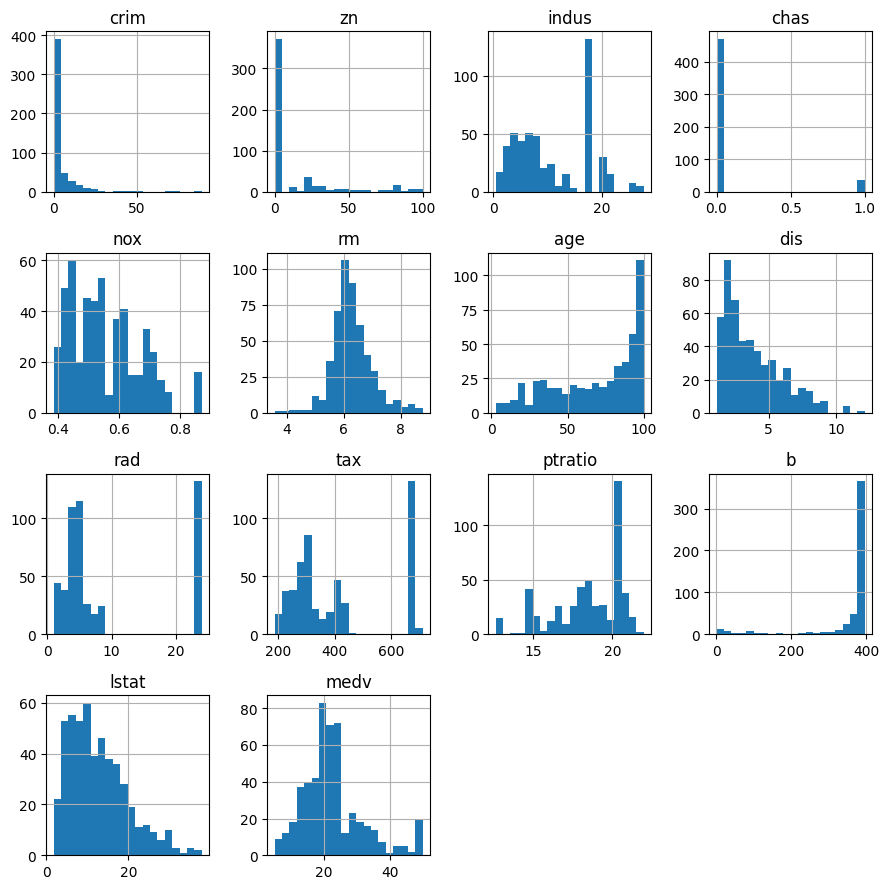

In [99]:
df.hist(bins=20, figsize=(9, 9))
plt.tight_layout()
plt.show()

Skewness tiap fitur:
crim       5.223149
zn         2.225666
indus      0.295022
chas       3.405904
nox        0.729308
rm         0.403612
age       -0.598963
dis        1.011781
rad        1.004815
tax        0.669956
ptratio   -0.802325
b         -2.890374
lstat      0.906460
medv       1.108098
dtype: float64


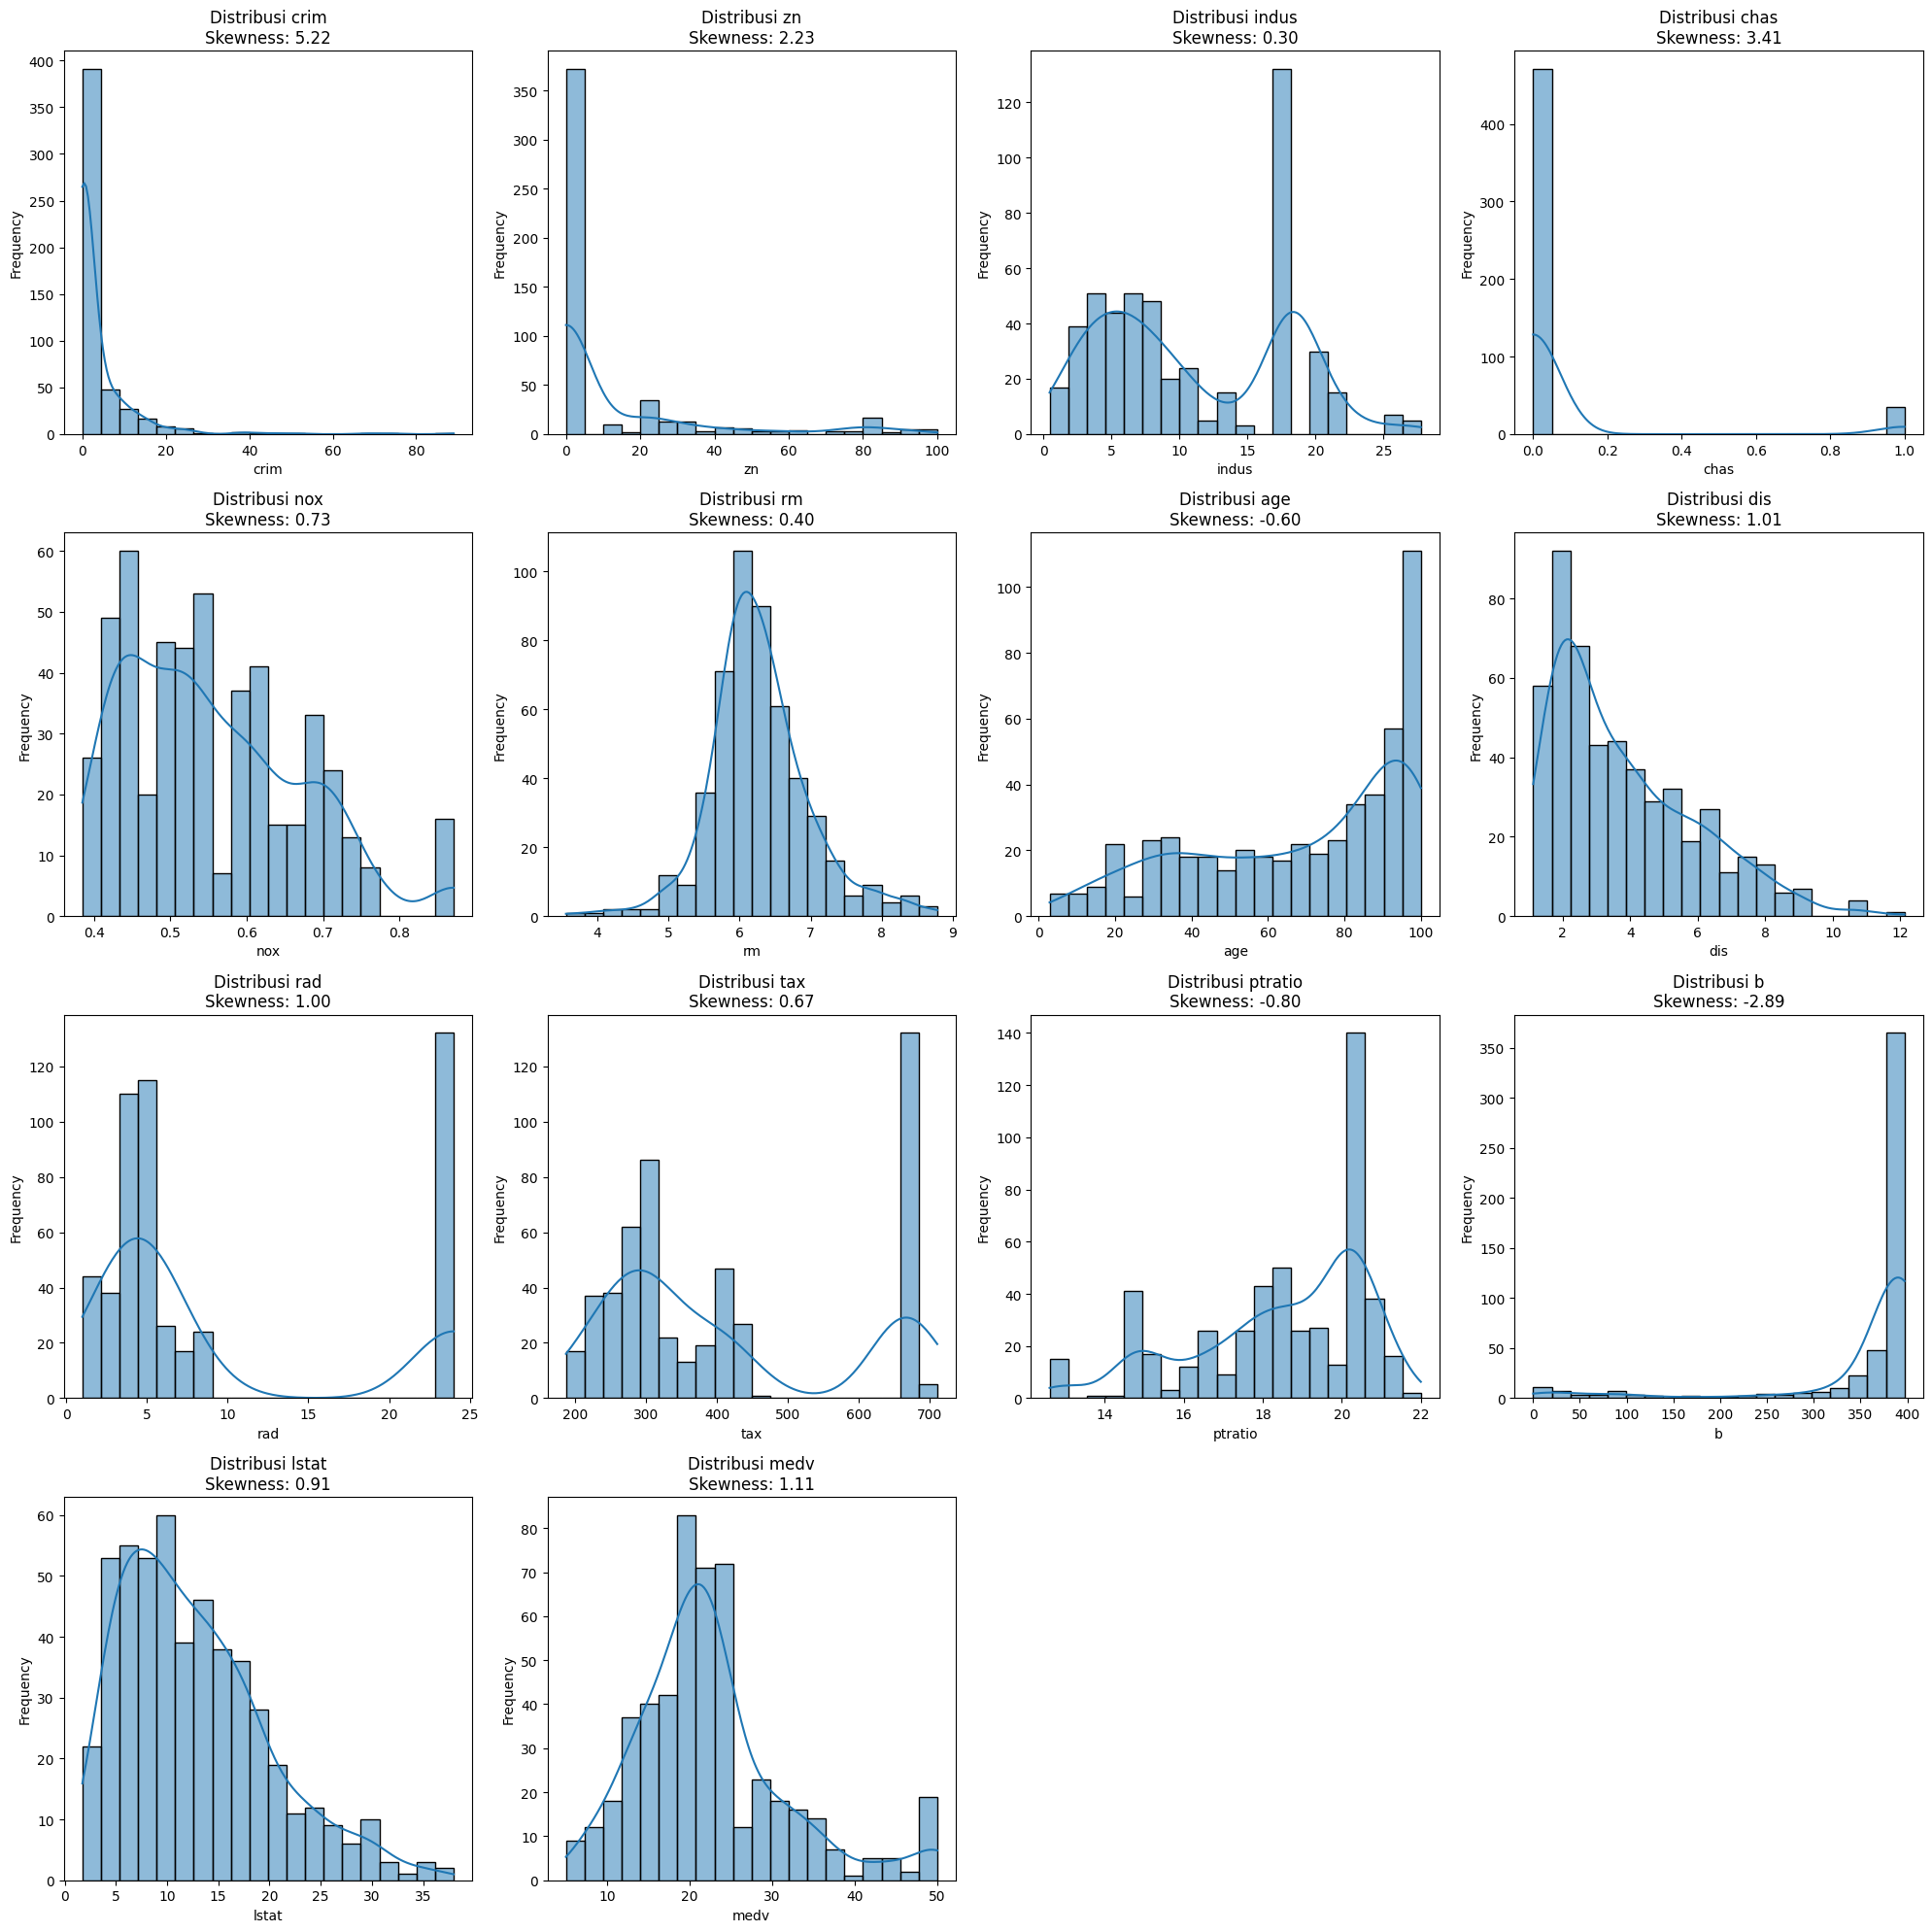

In [100]:
print("Skewness tiap fitur:")
print(df.skew())

fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.flatten()

for ax, col in zip(axes, df.columns):
    sns.histplot(df[col], kde=True, bins=20, ax=ax)
    ax.set_title(f'Distribusi {col}\nSkewness: {df[col].skew():.2f}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

if len(df.columns) < len(axes):
    for ax in axes[len(df.columns):]:
        ax.axis('off')

plt.tight_layout()
plt.show()

In [101]:
import numpy as np

df['crim_log'] = np.log1p(df['crim'])
df['zn_log']   = np.log1p(df['zn'])
df['chas_log'] = np.log1p(df['chas'])

from scipy import stats
df['b_yj'], _ = stats.yeojohnson(df['b'])

print("Skewness setelah transformasi:")
print(df[['crim_log', 'zn_log', 'chas_log', 'b_yj']].skew())

Skewness setelah transformasi:
crim_log    1.269201
zn_log      1.193451
chas_log    3.405904
b_yj       -1.908672
dtype: float64


$$
y^{(\lambda)} =
\begin{cases}
\displaystyle \frac{(y+1)^\lambda - 1}{\lambda}, & \text{if } y \ge 0 \text{ and } \lambda \neq 0, \\[10pt]
\log(y+1), & \text{if } y \ge 0 \text{ and } \lambda = 0, \\[10pt]
-\displaystyle \frac{(-y+1)^{2-\lambda} - 1}{2-\lambda}, & \text{if } y < 0 \text{ and } \lambda \neq 2, \\[10pt]
-\log(-y+1), & \text{if } y < 0 \text{ and } \lambda = 2.
\end{cases}
$$


Transformasi Yeo-Johnson adalah teknik untuk menormalkan distribusi data, terutama ketika data mengandung nilai negatif atau nol. Transformasi ini merupakan generalisasi dari Box-Cox Transform, yang hanya dapat digunakan untuk data positif.

* $y$ = Nilai asli dari data.
* $\lambda$ = Parameter transformasi (ditentukan secara otomatis oleh algoritma untuk optimasi).
* Bagian atas ($y ≥ 0$) mirip dengan Box-Cox Transform, tetapi bisa menangani nol
* Bagian bawah ($y ≤ 0$) merupakan bentuk yang memungkinkan tranformasi untuk bilangan negatif.

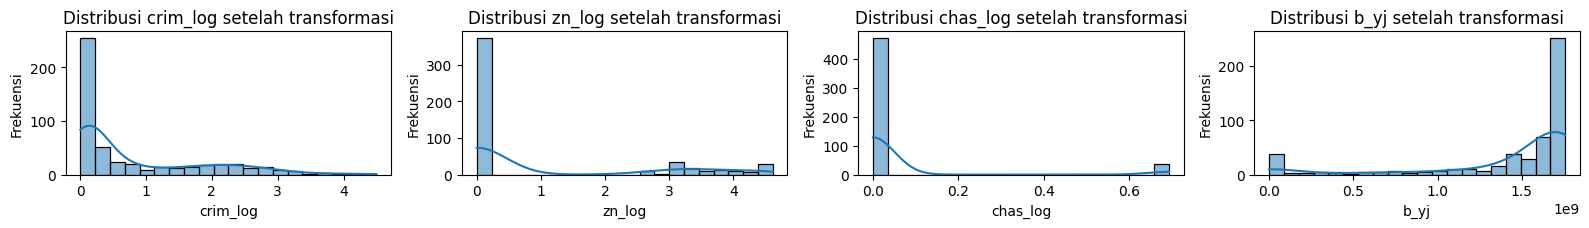

In [102]:
transformed_features = ['crim_log', 'zn_log', 'chas_log', 'b_yj']
fig, axes = plt.subplots(4, 4, figsize=(16, 8))
axes = axes.flatten()

for i, feature in enumerate(transformed_features):
    sns.histplot(df[feature], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Distribusi {feature} setelah transformasi')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frekuensi')

for j in range(i + 1, 16):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df_model = df.copy()
df_model['crim'] = df_model['crim_log']
df_model['zn']   = df_model['zn_log']
df_model['chas'] = df_model['chas_log']
df_model['b']    = df_model['b_yj']

X = df_model.drop(['medv', 'crim_log', 'zn_log', 'chas_log', 'b_yj'], axis=1)
y = df_model['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 24.950581042460257


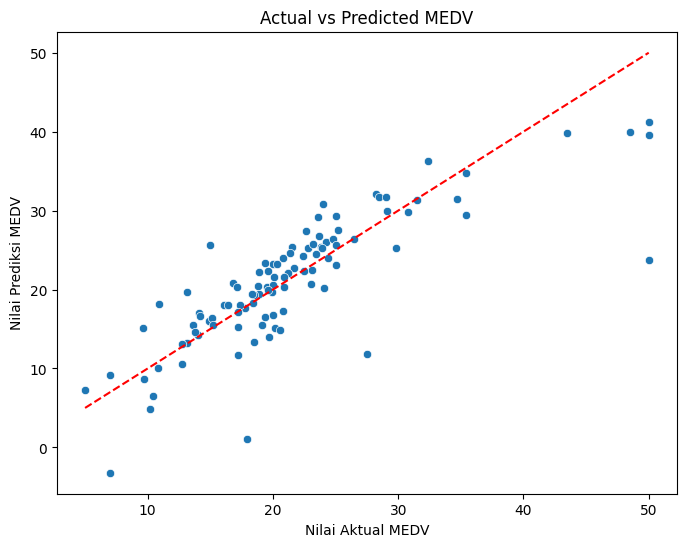

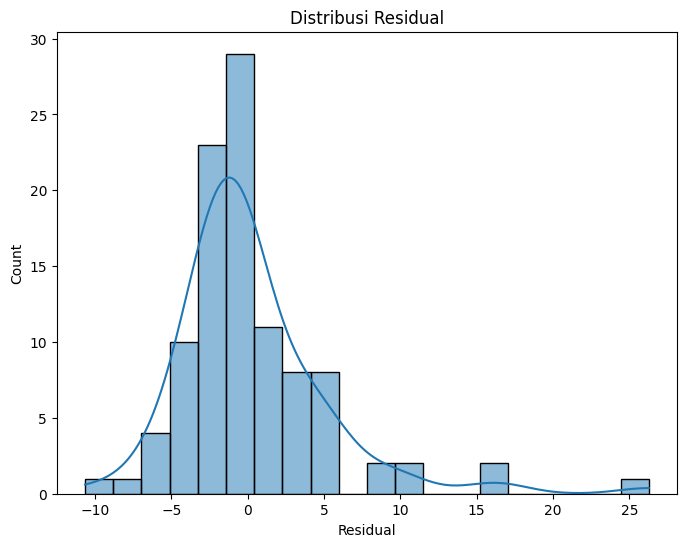

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Nilai Aktual MEDV")
plt.ylabel("Nilai Prediksi MEDV")
plt.title("Actual vs Predicted MEDV")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel("Residual")
plt.title("Distribusi Residual")
plt.show()

# Question!

1. Pada model di atas menggunakan transformasi data Yeo-Johnson. Eksplorasi transformasi data lainnya seperti Log Transform, Box-Cox Transform, atau Quantile Transform. Lakukan pembuatan model dengan masing-masing transformasi dan bandingkan hasilnya!

2. Lakukan eksplorasi terhadap metode normalisasi dan standardisasi data. Bandingkan metode MinMax Scaling, Standard Scaling, dan Robust Scaling dalam konteks data yang mengandung outlier. Bagaimana dampaknya terhadap akurasi model!

3. Pada model sebelumnya, fitur numerik langsung digunakan tanpa encoding. Eksplorasi apakah melakukan discretization pada fitur numerik dapat meningkatkan performa model, dibandingkan dengan tetap menggunakan fitur dalam bentuk kontinu.

# Penjelasan Pertanyaan diatas dengan lebih mendetail

---

## 1. Transformasi Data

**Deskripsi:**  
Pada model di atas digunakan transformasi data Yeo-Johnson.

**Tugas:**  
Eksplorasi transformasi data alternatif seperti **Log Transform**, **Box-Cox Transform**, dan **Quantile Transform**.

**Langkah Kerja:**  
- Lakukan pembuatan model dengan masing-masing metode transformasi.  
- Bandingkan hasil performa model yang dihasilkan dari tiap metode.

---

## 2. Normalisasi dan Standardisasi Data

**Deskripsi:**  
Metode normalisasi dan standardisasi perlu dieksplorasi, terutama pada data yang mengandung outlier.

**Tugas:**  
Bandingkan metode **MinMax Scaling**, **Standard Scaling**, dan **Robust Scaling**.

**Langkah Kerja:**  
- Terapkan masing-masing metode pada dataset yang mengandung outlier.  
- Analisis dan evaluasi dampak dari masing-masing metode terhadap akurasi model.

---

## 3. Discretization pada Fitur Numerik

**Deskripsi:**  
Pada model sebelumnya, fitur numerik digunakan dalam bentuk kontinu tanpa encoding.

**Tugas:**  
Eksplorasi apakah melakukan **discretization** pada fitur numerik dapat meningkatkan performa model.

**Langkah Kerja:**  
- Ubah fitur numerik menjadi bentuk kategori melalui teknik discretization.  
- Lakukan pelatihan model dengan fitur yang telah didiscretisasi.  
- Bandingkan performa model dengan model yang menggunakan fitur kontinu.

---

# Transformasi

## Log Transform

In [105]:
df['b_log']    = np.log1p(df['b'])

print("Skewness setelah Log Transform:")
print(df[['crim_log', 'zn_log', 'b_log', 'chas_log']].skew())

Skewness setelah Log Transform:
crim_log    1.269201
zn_log      1.193451
b_log      -4.459061
chas_log    3.405904
dtype: float64


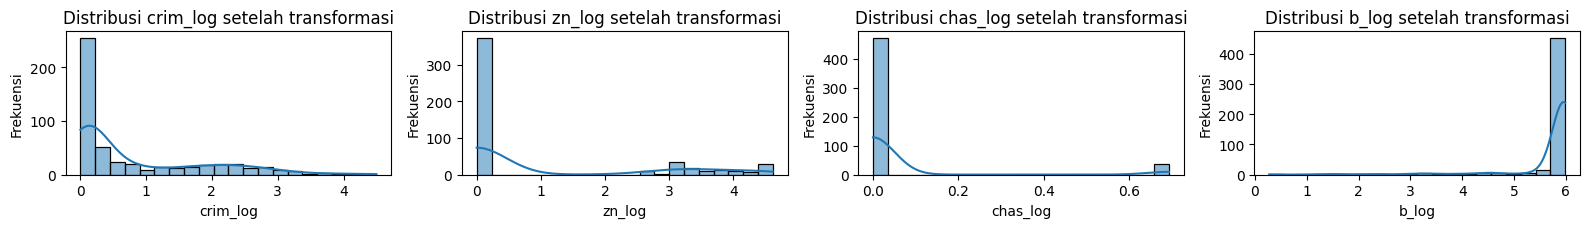

In [106]:
transformed_features = ['crim_log', 'zn_log', 'chas_log', 'b_log']
fig, axes = plt.subplots(4, 4, figsize=(16, 8))
axes = axes.flatten()

for i, feature in enumerate(transformed_features):
    sns.histplot(df[feature], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Distribusi {feature} setelah transformasi')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frekuensi')

for j in range(i + 1, 16):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [107]:
df_model = df.copy()
df_model['crim'] = df_model['crim_log']
df_model['zn']   = df_model['zn_log']
df_model['chas'] = df_model['chas_log']
df_model['b']    = df_model['b_log']

X = df_model.drop(['medv', 'crim_log', 'zn_log', 'chas_log', 'b_log'], axis=1)
y = df_model['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error Log:", mse)

Mean Squared Error Log: 24.16518220091631


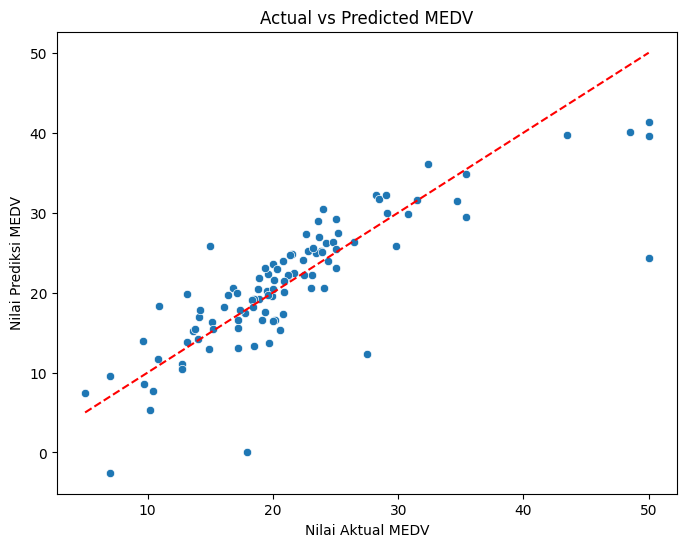

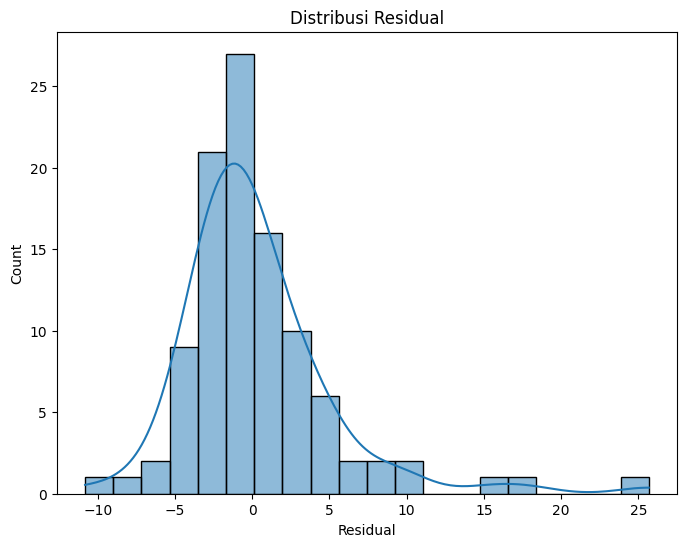

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Nilai Aktual MEDV")
plt.ylabel("Nilai Prediksi MEDV")
plt.title("Actual vs Predicted MEDV")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel("Residual")
plt.title("Distribusi Residual")
plt.show()

# Box-Cox Transform

In [109]:
df['crim_boxcox'], _ = stats.boxcox(df['crim'] + 1)
df['zn_boxcox'], _ = stats.boxcox(df['zn'] + 1)
df['chas_boxcox'], _ = stats.boxcox(df['chas'] + 1)
df['b_boxcox'], _ = stats.boxcox(df['b'] + 1)

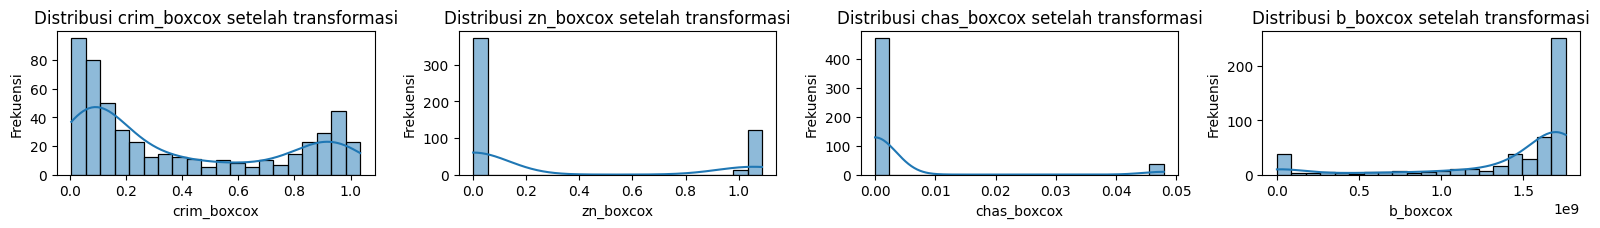

In [110]:
transformed_features = ['crim_boxcox', 'zn_boxcox', 'chas_boxcox', 'b_boxcox']
fig, axes = plt.subplots(4, 4, figsize=(16, 8))
axes = axes.flatten()

for i, feature in enumerate(transformed_features):
    sns.histplot(df[feature], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Distribusi {feature} setelah transformasi')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frekuensi')

for j in range(i + 1, 16):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [111]:
df_model = df.copy()
df_model['crim'] = df_model['crim_boxcox']
df_model['zn']   = df_model['zn_boxcox']
df_model['chas'] = df_model['chas_boxcox']
df_model['b']    = df_model['b_boxcox']

X = df_model.drop(['medv', 'crim_boxcox', 'zn_boxcox', 'chas_boxcox', 'b_boxcox'], axis=1)
y = df_model['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error Box-Cox:", mse)

Mean Squared Error Box-Cox: 23.453601194833166


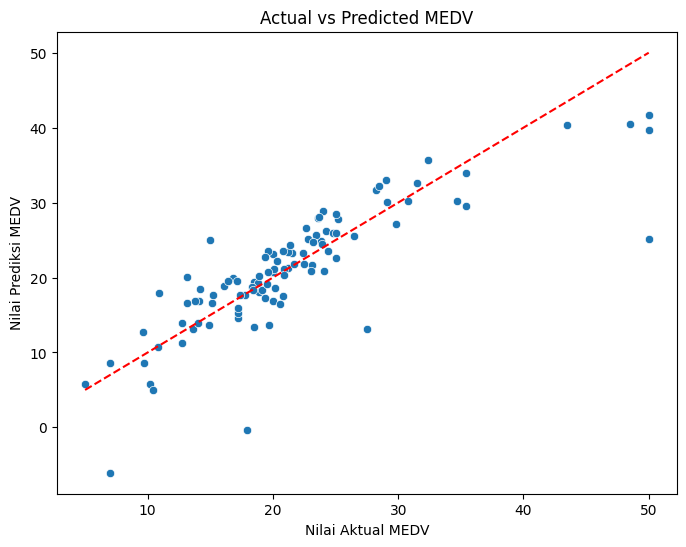

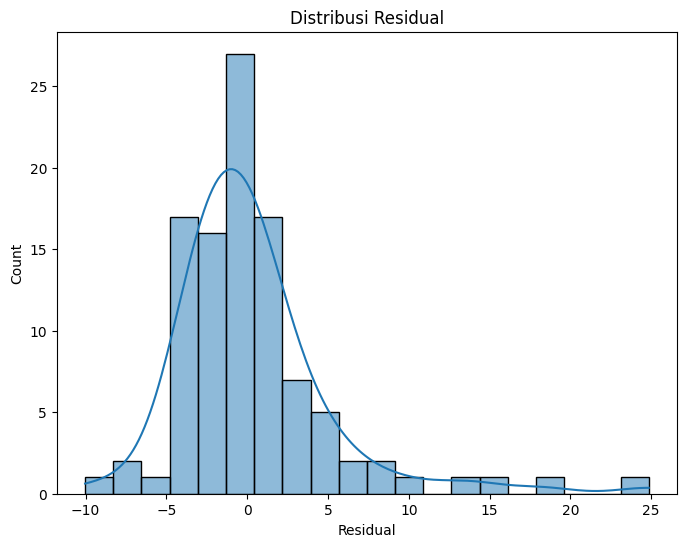

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Nilai Aktual MEDV")
plt.ylabel("Nilai Prediksi MEDV")
plt.title("Actual vs Predicted MEDV")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel("Residual")
plt.title("Distribusi Residual")
plt.show()

## Quantile

In [113]:
quantile_transformer = QuantileTransformer(output_distribution='normal')
df[['crim_quantile', 'zn_quantile', 'chas_quantile', 'b_quantile']] = quantile_transformer.fit_transform(df[['crim', 'zn', 'chas', 'b']])

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (506). n_quantiles is set to n_samples.
  warnings.warn(


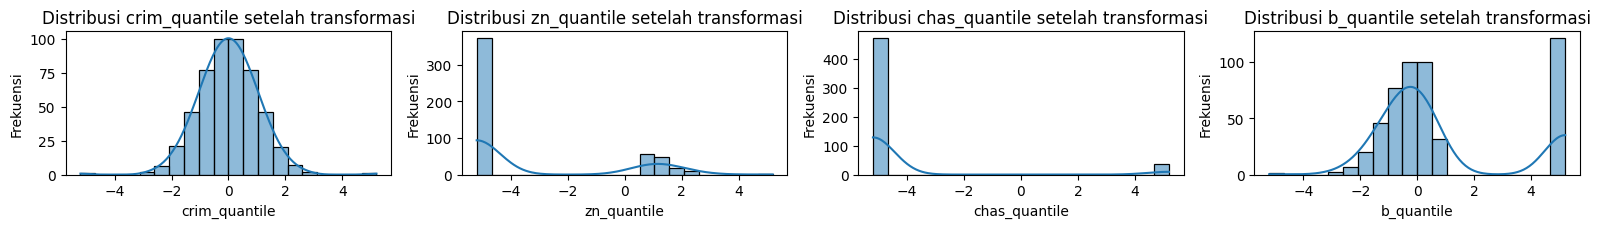

In [114]:
transformed_features = ['crim_quantile', 'zn_quantile', 'chas_quantile', 'b_quantile']
fig, axes = plt.subplots(4, 4, figsize=(16, 8))
axes = axes.flatten()

for i, feature in enumerate(transformed_features):
    sns.histplot(df[feature], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Distribusi {feature} setelah transformasi')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frekuensi')

for j in range(i + 1, 16):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [115]:
df_model = df.copy()
df_model['crim'] = df_model['crim_quantile']
df_model['zn']   = df_model['zn_quantile']
df_model['chas'] = df_model['chas_quantile']
df_model['b']    = df_model['b_quantile']

X = df_model.drop(['medv', 'crim_quantile', 'zn_quantile', 'chas_quantile', 'b_quantile'], axis=1)
y = df_model['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error Quantile:", mse)

Mean Squared Error Quantile: 23.57669679365337


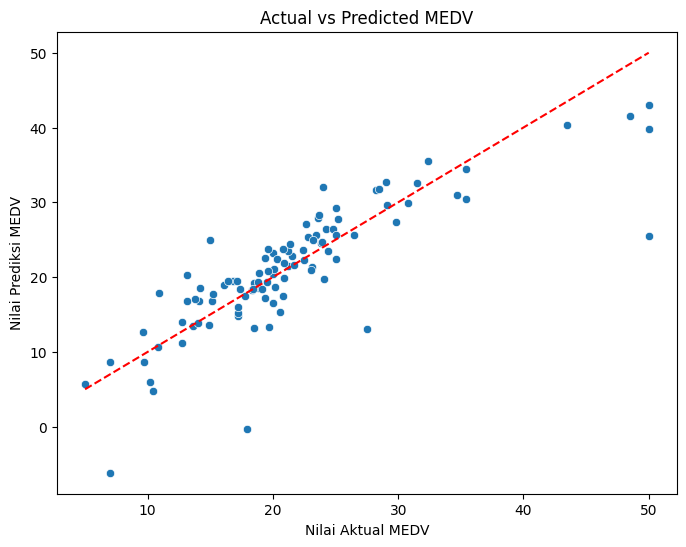

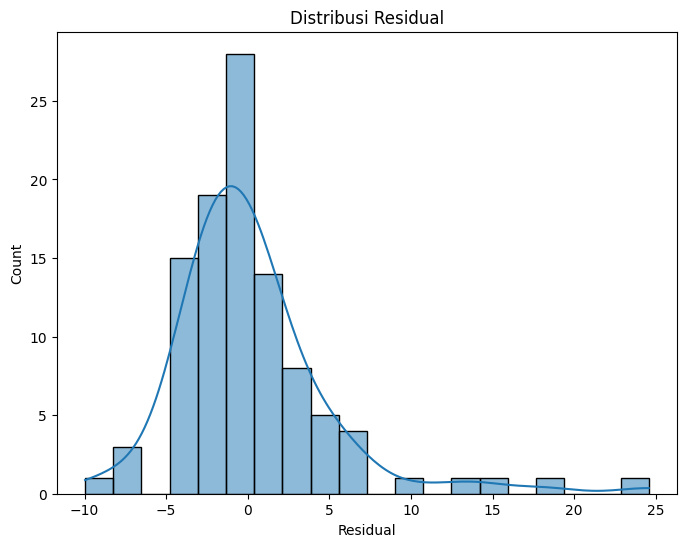

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Nilai Aktual MEDV")
plt.ylabel("Nilai Prediksi MEDV")
plt.title("Actual vs Predicted MEDV")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel("Residual")
plt.title("Distribusi Residual")
plt.show()

## Analisis

### YJ MSE: 24.950581042460257
### Log MSE: 24.16518220091631
### Box-cox MSE: 23.453601194833166
### Quantile MSE:23.57669679365337
* Box-Cox memiliki nilai MSE terendah (23.45) yang berarti model dengan Box-Cox transformation lebih akurat daripada yang lain.
* Quantile Transform MSE berbeda sedikit, yaitu 0.13 dari MSE Box-Cox. Hanya sedikit lebih buruk dari Box-Cox dengan nilai (23.58)
* Log Transform (24.17) lebih baik dari Yeo-Johnson (24.59)
* Transformasi Yeo-Johnson memiliki nilai MSE terburuk yang menunjukkan bahwa transformasi tidak bekerja optimal. Mungkin dikarenakan hanya fitur b yang diubah ke YJ.

# Normalisasi dan Standardisasi Data

In [117]:
X = df.drop(['medv'], axis=1)
y = df['medv']

## MinMaxScaler

In [118]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

Mean Squared Error dengan MinMaxScaler: 23.574490692692873


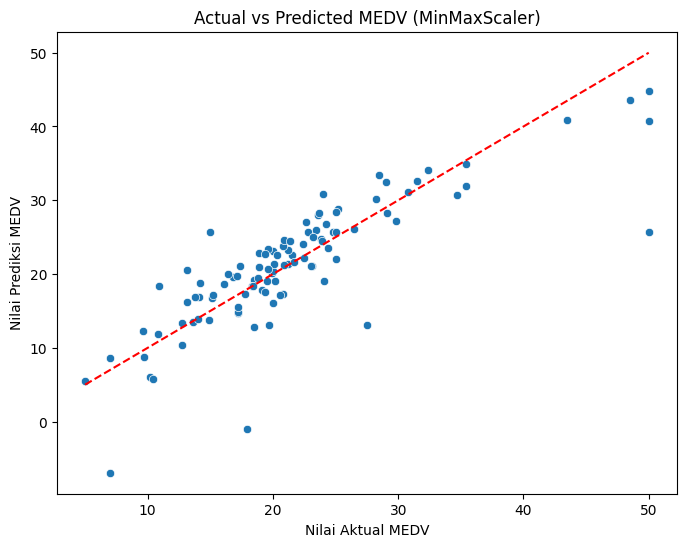

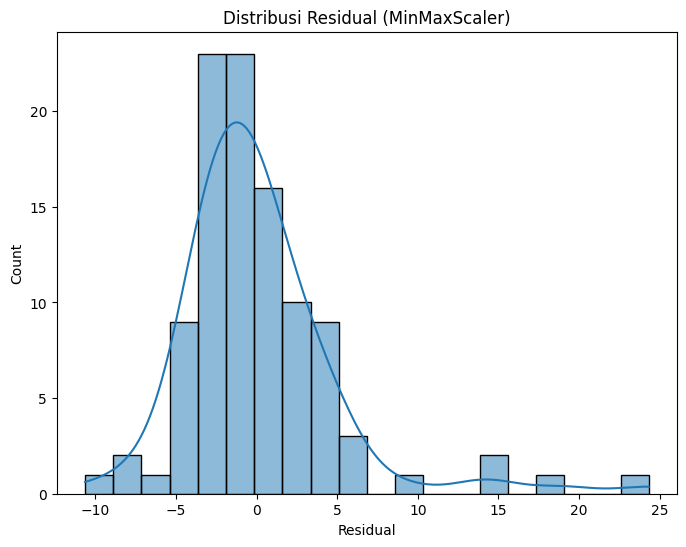

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error dengan {scaler.__class__.__name__}: {mse}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Nilai Aktual MEDV")
plt.ylabel("Nilai Prediksi MEDV")
plt.title(f"Actual vs Predicted MEDV ({scaler.__class__.__name__})")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel("Residual")
plt.title(f"Distribusi Residual ({scaler.__class__.__name__})")
plt.show()

## Standard Scaling

In [120]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Mean Squared Error dengan StandardScaler: 23.574490174535413


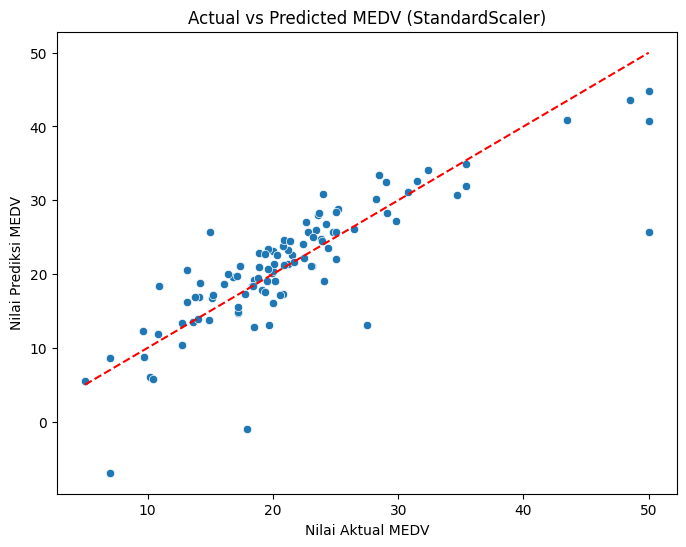

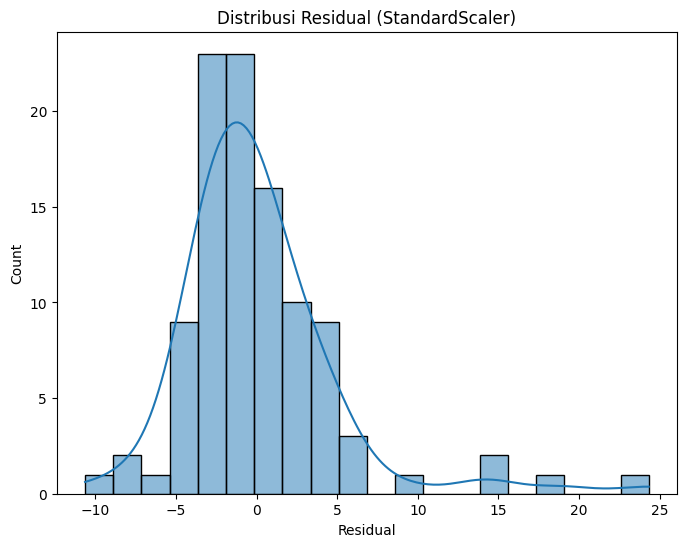

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error dengan {scaler.__class__.__name__}: {mse}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Nilai Aktual MEDV")
plt.ylabel("Nilai Prediksi MEDV")
plt.title(f"Actual vs Predicted MEDV ({scaler.__class__.__name__})")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel("Residual")
plt.title(f"Distribusi Residual ({scaler.__class__.__name__})")
plt.show()

## Robust Scaling

In [122]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

Mean Squared Error dengan RobustScaler: 23.57449026548622


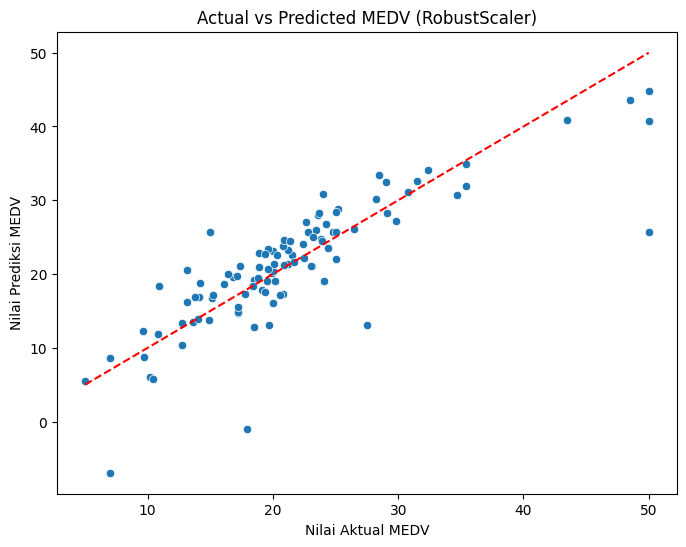

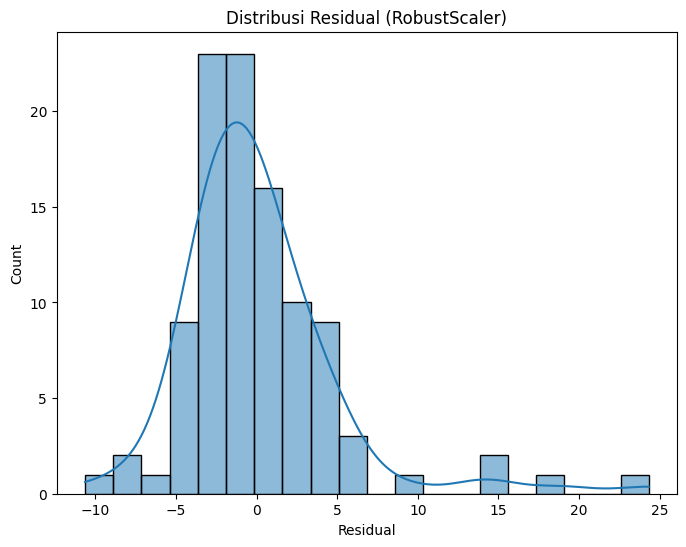

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error dengan {scaler.__class__.__name__}: {mse}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Nilai Aktual MEDV")
plt.ylabel("Nilai Prediksi MEDV")
plt.title(f"Actual vs Predicted MEDV ({scaler.__class__.__name__})")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel("Residual")
plt.title(f"Distribusi Residual ({scaler.__class__.__name__})")
plt.show()

## Analisis

### MinMax MSE: 23.574490692692873
### Standard MSE: 23.574490174535413
### Robust MSE: 23.57449026548622

* Setelah dijalankan normalisasi dan standardisasi tanpa mengubah skewness, didapatkan hasil yang sedikit lebih kecil daripada saat dilakukan transformasi skewness
* MSE dari hasil normalisasi dan standardisasi di atas sangat mirip yang menunjukkan bahwa normalisasi/standardisasi tidak terlalu berpengaruh signifikan terhadap akurasi dari model Linear Regression.
* Kemungkinan karena Linear Regression tidak terlalu sensitif terhadap skala fitur.

# Discretization

In [124]:
from sklearn.preprocessing import KBinsDiscretizer

num_features = ['crim', 'zn', 'chas', 'b']

discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

df_binned = df.copy()
df_binned[num_features] = discretizer.fit_transform(df[num_features])

X_binned = df_binned.drop(['medv'], axis=1)
y = df['medv']
X_train_binned, X_test_binned, y_train, y_test = train_test_split(X_binned, y, test_size=0.2, random_state=42)

model_binned = LinearRegression()
model_binned.fit(X_train_binned, y_train)

y_pred_binned = model_binned.predict(X_test_binned)
mse_binned = mean_squared_error(y_test, y_pred_binned)

print("MSE dengan Discretization:", mse_binned)

MSE dengan Discretization: 24.061580674068125


## Analisis

* Setelah dijalankan KBinsDiscretizer dengan 10 bins, nilai MSE hampir mirip dengan percobaan-percobaan sebelumnya.
* Dataset yang digunakan mungkin kurang cocok dengan discretization atau hubungan antara fitur dan target kurang linier sehingga penggunaan fitur kontinu lebih baik